In [1]:
#import the required libraries
%load_ext autoreload
%autoreload 2 
import pandas as pd
import numpy as np
import requests 
import matplotlib.pyplot as plt
import json
import seaborn as sns
from data_compilation import call_all_symbols
from data_cleaning import full_clean
from visualizations import *
from volatility import *
from hypothesis_tests import *

In [3]:
symbol_list = ['SLV', 'SIL', 'GLD', 'GDX', 'DJI']

In [4]:
#Getting the data
df = call_all_symbols(symbol_list)
df.tail()

In [5]:
#Cleaning data
df_clean = full_clean()

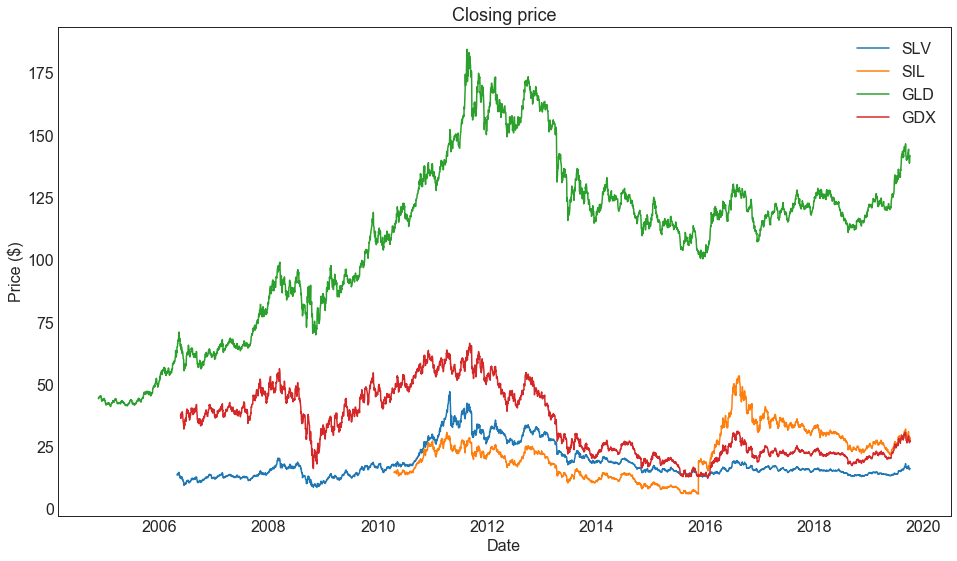

In [6]:
#make a plot from the observations
symbols = ['SLV', 'SIL', 'GLD','GDX']
visualizations_four(df_clean.copy(), symbols,
               type_price = 'close',
               start_date = '2000-01-01', 
               end_date = '2019-10-04', 
               fill_na = 'ffill',
               moving_average_plot = False,
               short_window = 20,
               long_window = 100)

# Volatility per month

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


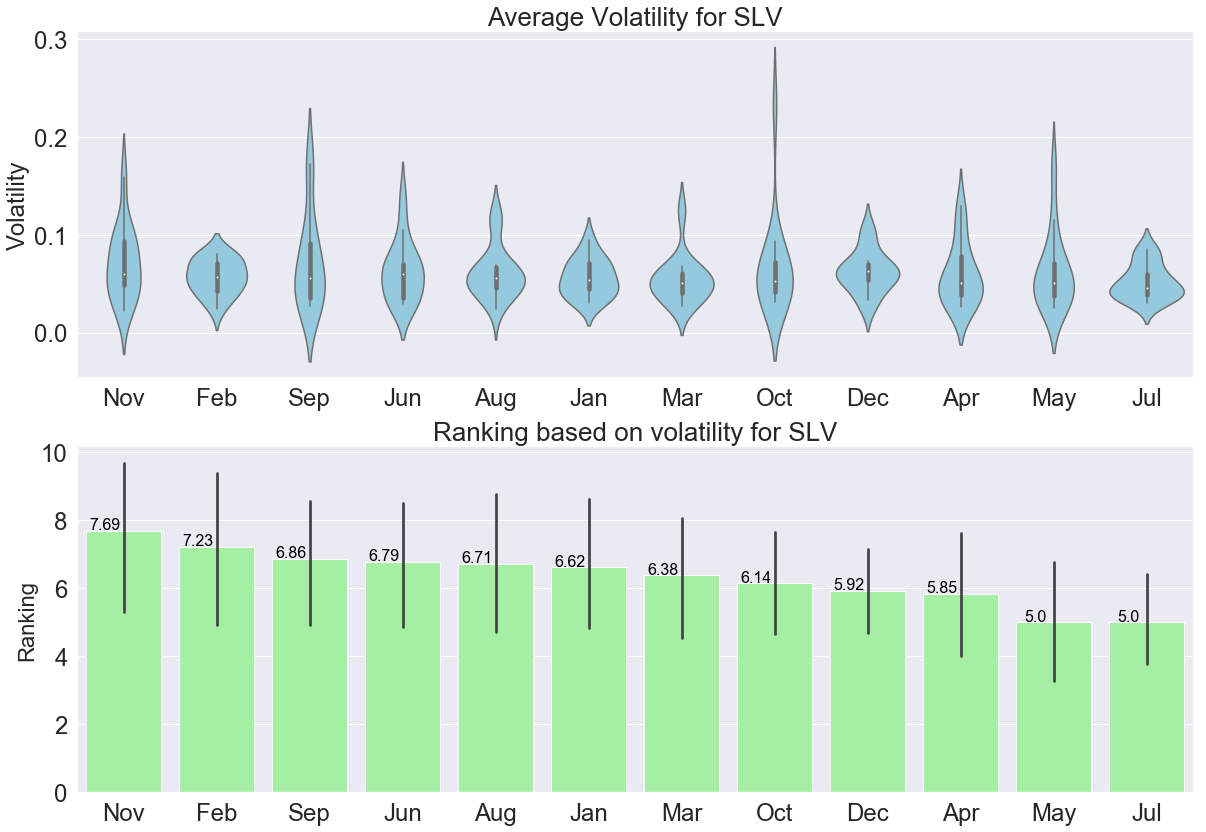

In [7]:
target_var = 'close'
target_symbol = 'SLV'
volability_period = 'M'
plot_option = True
n_bootstrap = 1000
if volability_period == 'Q':
    output_image_name = f'volatility_monthly_{target_var}_{target_symbol}_quarter'
elif volability_period == 'M':
    output_image_name = f'volatility_monthly_{target_var}_{target_symbol}_month'
    
volatility_set = compute_volatility(df_clean.copy(), target_var, target_symbol, volability_period)
monthly_vol_df, VOL_ranking_df = volatility_set
visualization_one(volatility_set, target_symbol, target_var, output_image_name)

Based on the p value of 0.58 and our aplha of 0.05 we fail to reject  the null hypothesis.
 Due to these results, we  cannot state that the seasonality in the volatility is due to chance in Apr
----------------------------------------------------------------------------------------------------
Based on the p value of 0.67 and our aplha of 0.05 we fail to reject  the null hypothesis.
 Due to these results, we  cannot state that the seasonality in the volatility is due to chance in Aug
----------------------------------------------------------------------------------------------------
Based on the p value of 0.63 and our aplha of 0.05 we fail to reject  the null hypothesis.
 Due to these results, we  cannot state that the seasonality in the volatility is due to chance in Dec
----------------------------------------------------------------------------------------------------
Based on the p value of 0.32 and our aplha of 0.05 we fail to reject  the null hypothesis.
 Due to these results, w

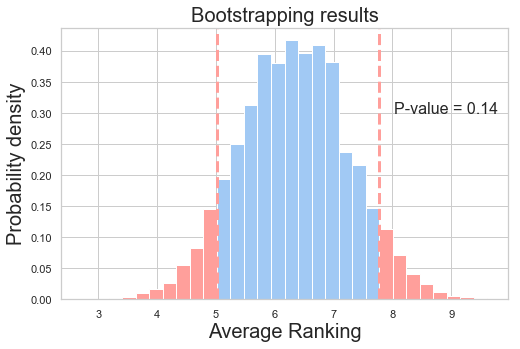

In [8]:
P_values = hypothesis_test_one(0.05, VOL_ranking_df, df_clean, 
                               target_var, target_symbol,volability_period,
                               n_bootstrap, plot_option, 'Nov')

# Volatility per quarter

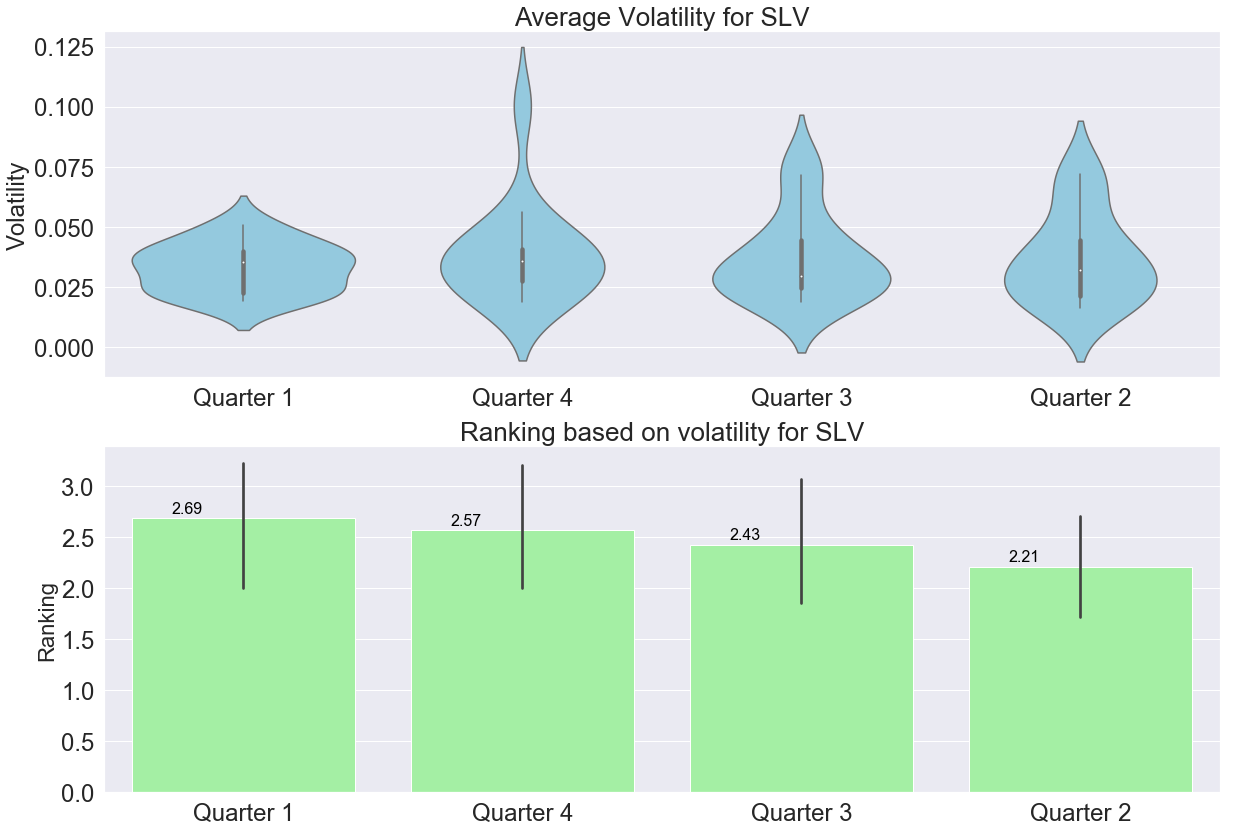

In [10]:
target_var = 'close'
target_symbol = 'SLV'
volability_period = 'Q'
plot_option = True
n_bootstrap = 10000
if volability_period == 'Q':
    output_image_name = f'volatility_monthly_{target_var}_{target_symbol}_quarter'
elif volability_period == 'M':
    output_image_name = f'volatility_monthly_{target_var}_{target_symbol}_month'
    
volatility_set = compute_volatility(df_clean.copy(), target_var, target_symbol, volability_period)
monthly_vol_df, VOL_ranking_df = volatility_set
visualization_one(volatility_set, target_symbol, target_var, output_image_name)

Based on the p value of 0.46 and our aplha of 0.05 we fail to reject  the null hypothesis.
 Due to these results, we  cannot state that the seasonality in the volatility is due to chance in Quarter 1
----------------------------------------------------------------------------------------------------
Based on the p value of 0.33 and our aplha of 0.05 we fail to reject  the null hypothesis.
 Due to these results, we  cannot state that the seasonality in the volatility is due to chance in Quarter 2
----------------------------------------------------------------------------------------------------
Based on the p value of 0.81 and our aplha of 0.05 we fail to reject  the null hypothesis.
 Due to these results, we  cannot state that the seasonality in the volatility is due to chance in Quarter 3
----------------------------------------------------------------------------------------------------
Based on the p value of 0.67 and our aplha of 0.05 we fail to reject  the null hypothesis.
 Due t

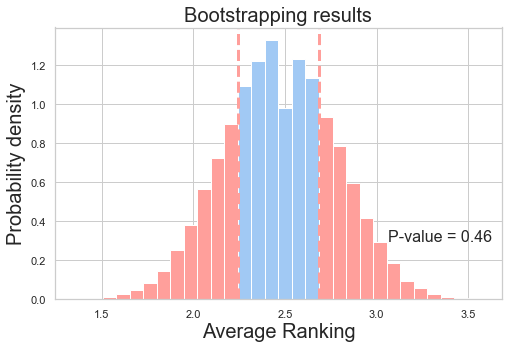

In [11]:
P_values = hypothesis_test_one(0.05, VOL_ranking_df, df_clean, 
                               target_var, target_symbol,volability_period,
                               n_bootstrap, plot_option, 'Quarter 1')